### Data Description
**id**                :	Unique ID for the customer\
**Gender**            : Gender of the customer\
**Age**	              : Age of the customer\
**Driving_License**    ==>	0 : Customer does not have DL, 1 : Customer already has DL\
**Region_Code**	      : Unique code for the region of the customer\
**Previously_Insured** ==>	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance\
**Vehicle_Age**	      : Age of the Vehicle\
**Vehicle_Damage**     ==>	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.\
**Annual_Premium**	  : The amount customer needs to pay as premium in the year\
**PolicySalesChannel**:	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.\
**Vintage**	          : Number of Days, Customer has been associated with the company\
**Response**          :	1 : Customer is interested, 0 : Customer is not interested



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\health insurance.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
## Checking for missing value
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
##Checking Outliers
#First, I separate of categorical or object and numerical data types (int64 & float64)
#This separation is done to check the outliers in the numeric column using the boxplot

numeric_col = []
categorical_col = []
for i in df.columns:
    #categorical columns
    if df[i].dtype == 'object':
        numeric_col.append(i)
    else:
        #numeric columns
        categorical_col.append(i)
        
print('Numerical Columns ({})'.format(len(numeric_col)))
print(numeric_col)
print('-'*100)
print('Categorical Columns ({})'.format(len(categorical_col)))
print(categorical_col)

Numerical Columns (3)
['Gender', 'Vehicle_Age', 'Vehicle_Damage']
----------------------------------------------------------------------------------------------------
Categorical Columns (9)
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


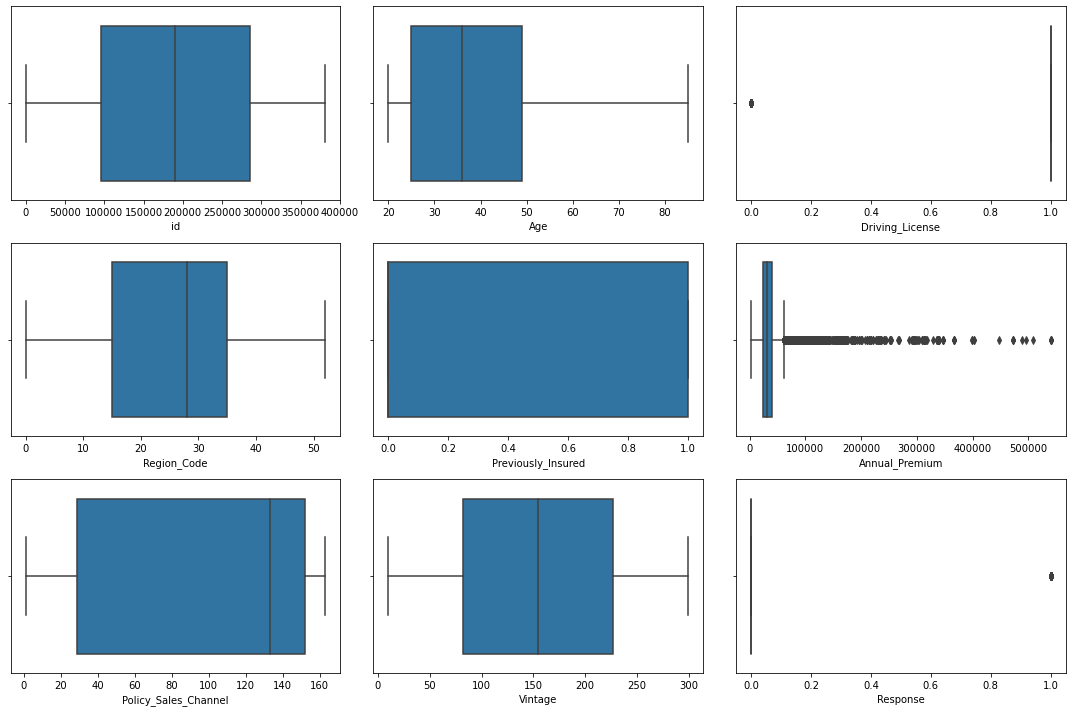

In [5]:
## Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

In [6]:
#Checking for balance/ imbalance data
(((df['Response'].value_counts())/len(df))*100).round(2)

0    87.74
1    12.26
Name: Response, dtype: float64

In [7]:
df.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [9]:
health_insuranceDESC = []

for i in df.columns:
    health_insuranceDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])


In [10]:
pd.DataFrame(data=health_insuranceDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,id,int64,0,0.0,381109,"[21539, 187728]"
1,Gender,object,0,0.0,2,"[Female, Male]"
2,Age,int64,0,0.0,66,"[59, 74]"
3,Driving_License,int64,0,0.0,2,"[0, 1]"
4,Region_Code,float64,0,0.0,53,"[37.0, 32.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[1-2 Year, < 1 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[41359.0, 31504.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[123.0, 136.0]"


### Data Analyst & Visualization

### `Response`

In [11]:
df.stb.freq(['Response'])

,Response,count,percent,cumulative_count,cumulative_percent
0,0,334399,87.743664,334399,87.743664
1,1,46710,12.256336,381109,100.000000


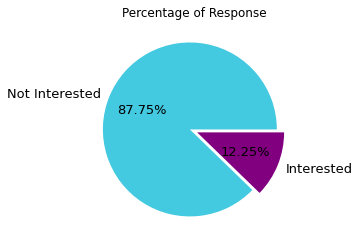

In [12]:
#Here are visualization of Response using pie chart
percentage = [87.74, 12.25]
label = ['Not Interested', 'Interested']

plt.pie( percentage, labels=label,
        colors=[ '#43c9e0', 'purple'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of Response')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\Attrition_Percent.png')
plt.show()

- Percentage of Customers who Not Interested in Vehicle Insurance around 87.75% while the rest around 12.25% Interested in Vehicle Insurance

In [13]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### `Gender`

In [14]:
df.stb.freq(['Gender'])

,Gender,count,percent,cumulative_count,cumulative_percent
0,Male,206089,54.07613,206089,54.07613
1,Female,175020,45.92387,381109,100.00000


In [15]:
(pd.crosstab(index=df['Gender'], columns=df['Response'], margins=True))

Response,0,1,All
Gender,,,
Female,156835,18185,175020
Male,177564,28525,206089
All,334399,46710,381109


In [16]:
((pd.crosstab(index=df['Gender'], columns=df['Driving_License'],normalize='index', margins=True))*100).round(2)

Driving_License,0,1
Gender,,
Female,0.12,99.88
Male,0.29,99.71
All,0.21,99.79


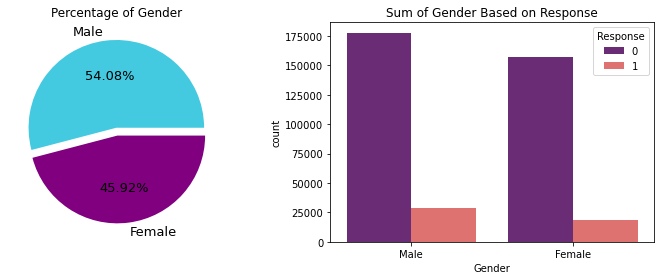

In [17]:
plt.figure(figsize=(10,4))

## Here is Pie Chart to know the percentage of Male & Female 
plt.subplot(1,2,1)
percentage = [54.07, 45.92]
label = ['Male', 'Female']

plt.pie( percentage, labels=label,
        colors=[ '#43c9e0', 'purple'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of Gender')

## Here is Countplot of Gender & Response to know the which gender who tend to interested in vehicle insurance
plt.subplot(1,2,2)
sns.countplot(x=df['Gender'], palette ='magma', hue=df['Response'])
plt.title('Sum of Gender Based on Response')


plt.tight_layout()
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\Attrition_Percent.png')
plt.show()

- Percentage Male more than Female : 54.08%
- From the countplot, it seem that Male tend to interested in Vehicle Insurance with total 28525 
- Both Male and Female customers mostly has Driving_License

### `Driving License`

In [18]:
df.stb.freq(['Driving_License'])

,Driving_License,count,percent,cumulative_count,cumulative_percent
0,1,380297,99.786938,380297,99.786938
1,0,812,0.213062,381109,100.000000


In [19]:
((pd.crosstab(index=df['Driving_License'], columns=df['Response'], normalize='index', margins=True))*100).round(2)

Response,0,1
Driving_License,,
0,94.95,5.05
1,87.73,12.27
All,87.74,12.26


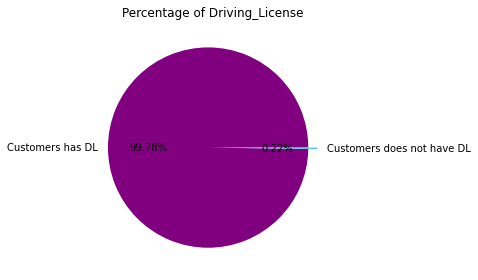

In [20]:
plt.figure(figsize=(10,4))

## Here is Pie Chart to know the percentage of Driving_License
plt.subplot(1,2,1)
percentage = [99.78, 0.22]
label = ['Customers has DL', 'Customers does not have DL']

plt.pie( percentage, labels=label,
        colors=['purple', '#43c9e0'],
        startangle=0,
        textprops ={
            'size': 10,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of Driving_License')


plt.tight_layout()
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\Attrition_Percent.png')
plt.show()

In [21]:
pd.crosstab(index=df['Driving_License'], columns=df['Response'], values=df['Age'], aggfunc='mean')

Response,0,1
Driving_License,,
0,65.952010,59.073171
1,38.114043,43.421822


- Mostly customers has Driving_License
- Percentage Customers who has Driving_License and Interest in Vehicle Insurance around 12.27%
- Average Age of Customers who has Driving_License and Interest in Vehicle Insurance around 43

### `Region_Code`

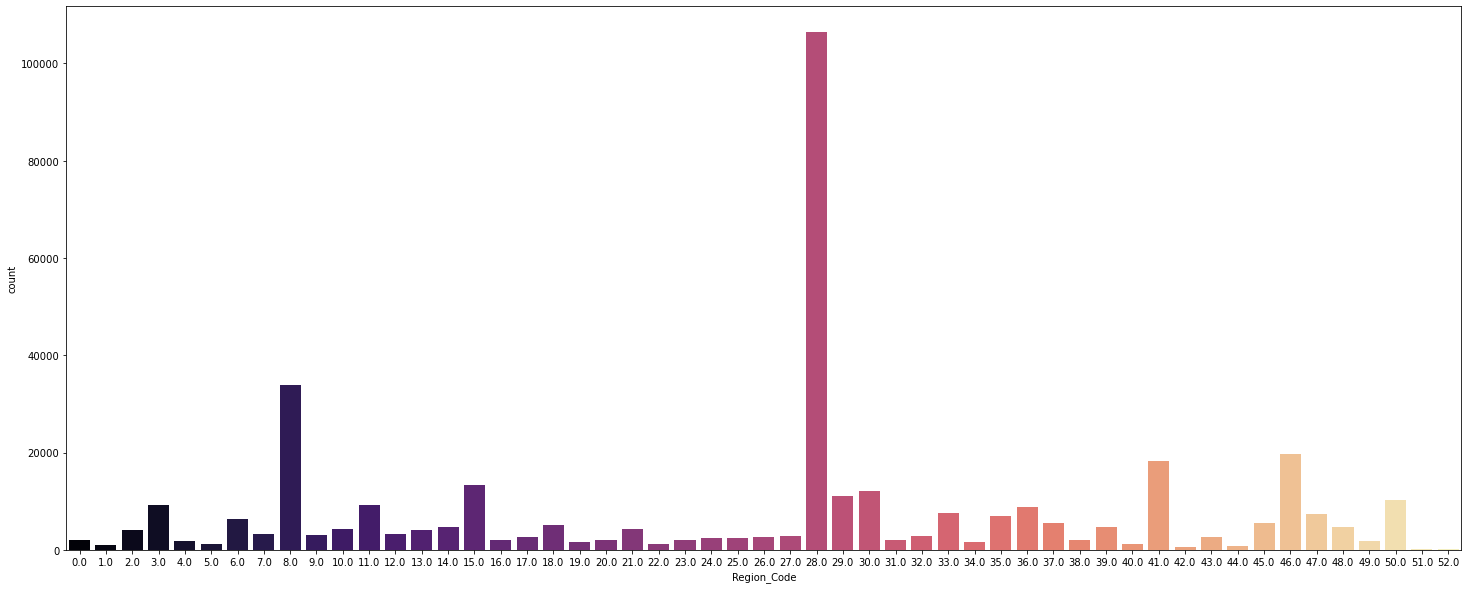

In [22]:
plt.figure(figsize=(25,10))
sns.countplot(x=df['Region_Code'], palette='magma')
plt.show()

In [23]:
df_28 = df[df['Region_Code'] == 28.0]
((pd.crosstab(index=df_28['Response'], columns=df_28['Region_Code'], normalize='columns', margins=True))*100).round(2)

Region_Code,28.0,All
Response,,
0,81.28,81.28
1,18.72,18.72


- Region_Code of the customers that mostly appears is 28.0
- Around 18.72% of customers who has 28.0 Region_Code Interest in vehicle insurance

### `Previously_Insured`

In [24]:
df.stb.freq(['Previously_Insured'])

,Previously_Insured,count,percent,cumulative_count,cumulative_percent
0,0,206481,54.178988,206481,54.178988
1,1,174628,45.821012,381109,100.000000


In [25]:
((pd.crosstab(index=df['Previously_Insured'], columns=df['Response'], normalize='index'))*100).round(2)

Response,0,1
Previously_Insured,,
0,77.45,22.55
1,99.91,0.09


- Customers who doesn't have Vehicle Insurance has more high percentage of Interesting in Vehichel Insurance (22.55%)
- Customers who already have Vehicle Insurance tend Not Interest in Vehichel Insurance

### `Vehicle_Age`

In [26]:
df.stb.freq(['Vehicle_Age'])

,Vehicle_Age,count,percent,cumulative_count,cumulative_percent
0,1-2 Year,200316,52.561341,200316,52.561341
1,< 1 Year,164786,43.238549,365102,95.799889
2,> 2 Years,16007,4.200111,381109,100.000000


In [27]:
((pd.crosstab(index=df['Vehicle_Age'], columns=df['Response'], normalize='index', margins=True))*100).round(2)

Response,0,1
Vehicle_Age,,
1-2 Year,82.62,17.38
< 1 Year,95.63,4.37
> 2 Years,70.63,29.37
All,87.74,12.26


In [28]:
data_vehicle={
    'Not Interested': [82.62, 95.63, 70.63],
    'Interested' : [17.38, 4.37, 29.37],
    'vehicle_age' : ['1-2 Year', '< 1 Year', '> 2 Year']
}

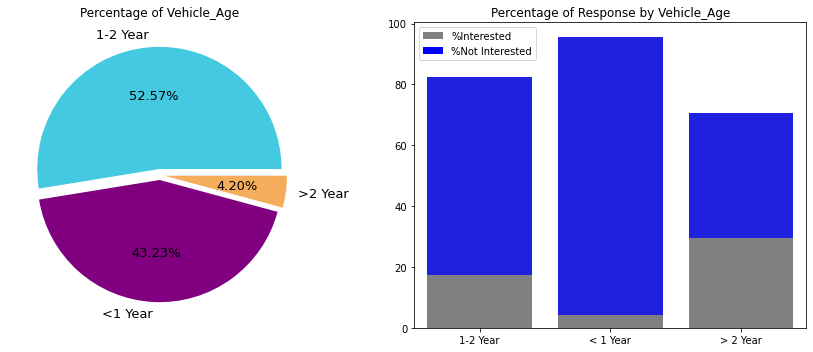

In [29]:
plt.figure(figsize=(12,5))

## Here is Pie Chart to know the percentage of Male & Female 
plt.subplot(1,2,1)
percentage = [52.56, 43.23, 4.2]
label = ['1-2 Year', '<1 Year', '>2 Year']

plt.pie( percentage, labels=label,
        colors=[ '#43c9e0', 'purple', '#f5ad5b'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04, .04)
)
plt.title('Percentage of Vehicle_Age')

## Here is stack bar to show percentage of Vehicle_Age that interest and Not interest in Vehicle Insurance
plt.subplot(1,2,2)
#plot 1 - backgroud - Not Interested
sns.barplot(x=data_vehicle['vehicle_age'], y=data_vehicle['Not Interested'], color='blue')

#plot 2 - Interested
sns.barplot(x=data_vehicle['vehicle_age'], y=data_vehicle['Interested'], color='grey')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='grey',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Interested', '%Not Interested'], loc='upper left', ncol = 1, prop={'size':10})
plt.title('Percentage of Response by Vehicle_Age')

plt.tight_layout()
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\Attrition_Percent.png')
plt.show()

- Age 1-2 Year of Vehicle has the highest percentage around 52.57% while the smallest percentage come from >2 Year Age of Vehicle with just 4.20%
- Eventhough >2 Year has the smallest percentage of Vehicle_Age, but it has the highest of Interested in Vehicle Insurance with around 29.37% compare to other
- it show that vehicle with old age tend to has interest in vehicle insurance

### `Vehicle_Damage`

In [30]:
df.stb.freq(['Vehicle_Damage'])

,Vehicle_Damage,count,percent,cumulative_count,cumulative_percent
0,Yes,192413,50.487656,192413,50.487656
1,No,188696,49.512344,381109,100.000000


In [31]:
((pd.crosstab(index=df['Vehicle_Damage'], columns=df['Response'], normalize='index', margins=True))*100).round(2)

Response,0,1
Vehicle_Damage,,
No,99.48,0.52
Yes,76.23,23.77
All,87.74,12.26


In [32]:
data_damage = {
    'Not Interested': [99.48, 76.23],
    'Interested' : [0.52, 23.77],
    'vehicle_damage' : ['No', 'Yes']
}

In [33]:
((pd.crosstab(index=df['Vehicle_Age'], columns=df['Vehicle_Damage'], normalize='index', margins=True))*100).round(2)

Vehicle_Damage,No,Yes
Vehicle_Age,,
1-2 Year,35.99,64.01
< 1 Year,70.75,29.25
> 2 Years,0.09,99.91
All,49.51,50.49


In [34]:
damage_age={
    'No': [35.99, 70.75, 0.09],
    'Yes' : [64.01, 29.25, 99.91],
    'vehicle_age' : ['1-2 Year', '< 1 Year', '> 2 Year']
}

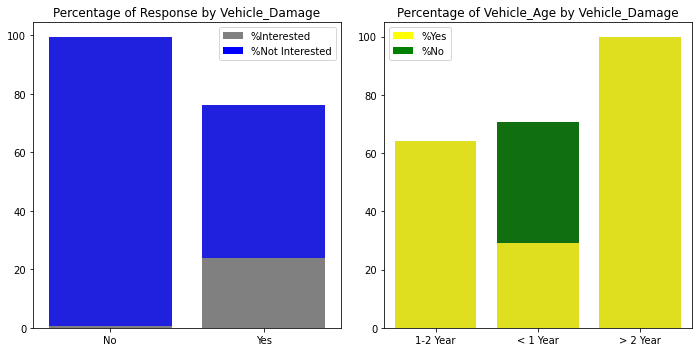

In [35]:
plt.figure(figsize=(10,5))

## Here is stack bar to show percentage of Vehicle_Damage by Response
plt.subplot(1,2,1)
#plot 1 - backgroud - Not Interested
sns.barplot(x=data_damage['vehicle_damage'], y=data_damage['Not Interested'], color='blue')

#plot 2 - Interested
sns.barplot(x=data_damage['vehicle_damage'], y=data_damage['Interested'], color='grey')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='grey',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Interested', '%Not Interested'], loc='best', ncol = 1, prop={'size':10})
plt.title('Percentage of Response by Vehicle_Damage')

#-----------------------------------------------------------------

## Here is stack bar to show percentage of Vehicle_Age by Vehicle_Damage
plt.subplot(1,2,2)
#plot 1 - backgroud - Not Interested
sns.barplot(x=damage_age['vehicle_age'], y=damage_age['No'], color='green')

#plot 2 - Interested
sns.barplot(x=damage_age['vehicle_age'], y=damage_age['Yes'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Yes', '%No'], loc='upper left', ncol = 1, prop={'size':10})
plt.title('Percentage of Vehicle_Age by Vehicle_Damage')

plt.tight_layout()
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\Attrition_Percent.png')
plt.show()

- Percentage of Customers that has Vehicle_Damage (Yes) highly rather than No Vehicle_Damage
- Customers that has Vehicle_Damage (Yes) has the highly percentage of Interested in Vehicle Insurance (23.77%)
- Customers that has Vehicle_Damage (No) just has little percentage of Interested in Vehicle Insurance (0.52%)
- Customers with Vehicle_Age >2 Years and Vehicle_Damage (Yes) has the highest percentage of Interested in Vehicle Insurance around 99.91%
- Also Customers with Vehicle_Age 1-2 Years and Vehicle_Damage (Yes) has high percentage of Interested in Vehicle Insurance around 64.01%
- It show that customers with Vehicle_Age >2 Years and has Vehicle_Damage (Yes) tend to Interested in Vehicle Insurance

In [36]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### `Annual_Premium`

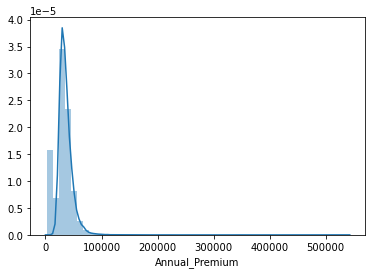

In [38]:
sns.distplot(df['Annual_Premium'])

### `Policy_Sales_Channel`

In [44]:
df_channel = pd.DataFrame(data = df.stb.freq(['Policy_Sales_Channel']).head(10))
df_channel

,Policy_Sales_Channel,count,percent,cumulative_count,cumulative_percent
0,152.0,134784,35.366260,134784,35.366260
1,26.0,79700,20.912652,214484,56.278912
2,124.0,73995,19.415705,288479,75.694618
3,160.0,21779,5.714638,310258,81.409256
4,156.0,10661,2.797362,320919,84.206618
5,122.0,9930,2.605554,330849,86.812172
6,157.0,6684,1.753829,337533,88.566001
7,154.0,5993,1.572516,343526,90.138517
8,151.0,3885,1.019393,347411,91.157910
9,163.0,2893,0.759100,350304,91.917011


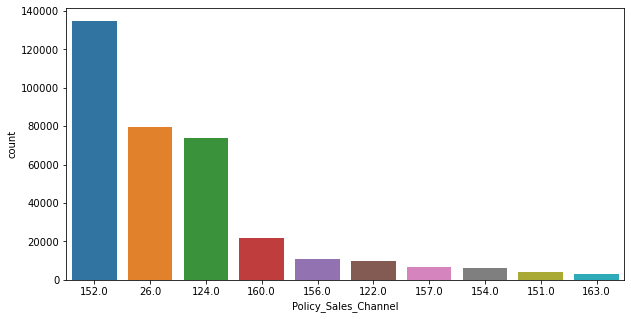

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_channel['Policy_Sales_Channel'], y=df_channel['count'], order=df_channel['Policy_Sales_Channel'])

- Most Anonymized Code for the channel of outreaching to the customer is 152 with total percentage 35.36%

### `Vintage`
Number of Days, Customer has been associated with the company

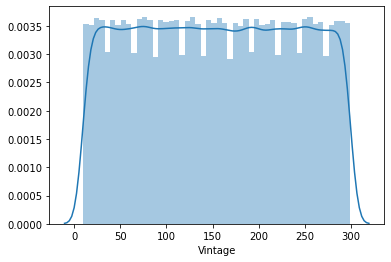

In [50]:
sns.distplot(df['Vintage'])

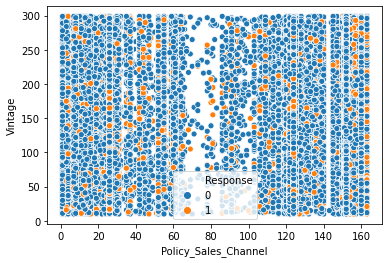

In [53]:
sns.scatterplot(y=df['Vintage'], x=df['Policy_Sales_Channel'], hue=df['Response'])

### Data Preparation

In [61]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [56]:
#Encoding 
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})

In [58]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year':1, '> 2 Years':2})

In [60]:
#Drop columns that will not use
df.drop(columns='id', inplace=True)

In [62]:
df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [93]:
#copy the dataset 
df_health = df.copy()

### Machine Learning Modeling

In [63]:
x=df.drop(columns='Response')
y=df['Response']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=.80, random_state=42)

### Base Model

### 1. Base Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
modelDT = DecisionTreeClassifier()

In [68]:
#fit model
modelDT.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
y_predDT = modelDT.predict(x_test)

In [70]:
#Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [71]:
acc_DT = accuracy_score(y_test, y_predDT)
acc_DT

0.8233580855920862

In [72]:
prec_DT = precision_score(y_test, y_predDT)
prec_DT

0.2893930104230533

In [74]:
rec_DT = recall_score(y_test, y_predDT)
rec_DT

0.3031470777135517

In [75]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.29      0.30      0.30      9342

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



In [76]:
cm_DT = confusion_matrix(y_test, y_predDT, labels=[1,0])
df_DT = pd.DataFrame(data=cm_DT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_DT

,Pred 1,Pred 0
Akt 1,2832,6510
Akt 0,6954,59926


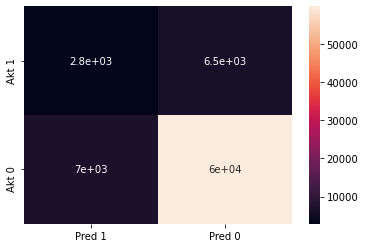

In [77]:
sns.heatmap(df_DT, annot=True)

### 2. Base Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
modelRF = RandomForestClassifier()

In [81]:
modelRF.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
y_predRF = modelRF.predict(x_test)

In [86]:
acc_RF = accuracy_score(y_test, y_predRF)
print('accuracy : {}'.format(acc_RF))

prec_RF = precision_score(y_test, y_predRF)
print('Precision : {}'.format(prec_RF))

rec_RF = recall_score(y_test, y_predRF)
print('Recall : {}'.format(rec_RF))

print('-'*100)
print(classification_report(y_test, y_predRF))

accuracy : 0.8667182703156568
Precision : 0.3668947539915282
Recall : 0.1205309355598373
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66880
           1       0.37      0.12      0.18      9342

    accuracy                           0.87     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.82      0.87      0.84     76222



In [87]:
cm_RF = confusion_matrix(y_test, y_predRF, labels=[1,0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_RF

,Pred 1,Pred 0
Akt 1,1126,8216
Akt 0,1943,64937


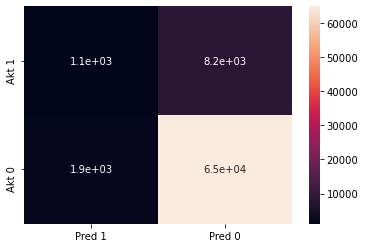

In [88]:
sns.heatmap(df_RF, annot=True)

#### Handling Imbalance Data
Since recall (+) from both base model still low, let's handling the imbalance

### `1. Random Over Sampling`

In [97]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.shape

(304887, 11)

In [98]:
df_train['Response'].value_counts()

0    267519
1     37368
Name: Response, dtype: int64

In [99]:
yes_insurance = df_train[df_train['Response'] == 1] #Class Minority
no_insurance = df_train[df_train['Response'] == 0 ] #Class Majority

In [100]:
from sklearn.utils import resample

In [101]:
yes_insurance_oversample = resample(yes_insurance,
                                   replace=True,
                                   n_samples = len(no_insurance),
                                   random_state =42)

In [102]:
df_OverSample = pd.concat([no_insurance, yes_insurance_oversample])

In [104]:
df_OverSample['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

In [105]:
x_train_oversample = df_OverSample.drop(columns='Response')
y_train_oversample = df_OverSample['Response']

#### 1. OverSample Decision Tree

In [106]:
modelOS=DecisionTreeClassifier()

In [107]:
modelOS.fit(x_train_oversample, y_train_oversample)

DecisionTreeClassifier()

In [108]:
y_predDT_OS = modelOS.predict(x_test)

In [109]:
accOS_DT = accuracy_score(y_test, y_predDT_OS)
print('accuracy : {}'.format(accOS_DT))

precOS_DT = precision_score(y_test, y_predDT_OS)
print('Precision : {}'.format(precOS_DT))

recOS_DT = recall_score(y_test, y_predDT_OS)
print('Recall : {}'.format(recOS_DT))

print('-'*100)
print(classification_report(y_test, y_predDT_OS))

accuracy : 0.829996588911338
Precision : 0.2982142857142857
Recall : 0.28602012417041317
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     66880
           1       0.30      0.29      0.29      9342

    accuracy                           0.83     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.83      0.83     76222



In [110]:
cmOS_DT = confusion_matrix(y_test, y_predDT_OS, labels=[1,0])
dfOS_DT = pd.DataFrame(data=cmOS_DT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
dfOS_DT

,Pred 1,Pred 0
Akt 1,2672,6670
Akt 0,6288,60592


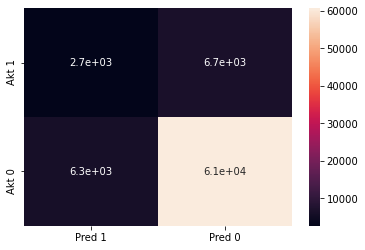

In [117]:
sns.heatmap(dfOS_DT, annot=True)

#### 2. Oversample Random Forest

In [111]:
modelOS_RF = RandomForestClassifier()

In [112]:
modelOS_RF.fit(x_train_oversample, y_train_oversample)

RandomForestClassifier()

In [113]:
y_predRF_OS = modelOS_RF.predict(x_test)

In [119]:
accOS_RF = accuracy_score(y_test, y_predRF_OS)
print('accuracy : {}'.format(accOS_RF))

precOS_RF = precision_score(y_test, y_predRF_OS)
print('Precision : {}'.format(precOS_RF))

recOS_RF = recall_score(y_test, y_predRF_OS)
print('Recall : {}'.format(recOS_RF))

print('-'*100)
print(classification_report(y_test, y_predRF_OS))

accuracy : 0.8480360001049566
Precision : 0.3454269554421299
Recall : 0.26803682295011777
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     66880
           1       0.35      0.27      0.30      9342

    accuracy                           0.85     76222
   macro avg       0.62      0.60      0.61     76222
weighted avg       0.83      0.85      0.84     76222



In [115]:
cmOS_RF = confusion_matrix(y_test, y_predRF_OS, labels=[1,0])
dfOS_RF = pd.DataFrame(data=cmOS_RF, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
dfOS_RF

,Pred 1,Pred 0
Akt 1,2504,6838
Akt 0,4745,62135


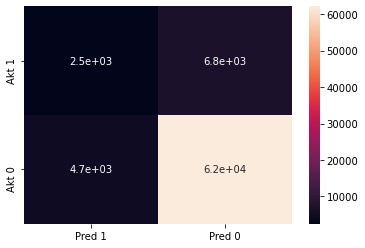

In [118]:
sns.heatmap(dfOS_RF, annot=True)

### `2. SMOTE`

In [122]:
import imblearn
from imblearn.over_sampling import SMOTE

In [123]:
sm = SMOTE(random_state=42)

#### 1. SMOTE Decision Tree

In [124]:
modelSMOTE_DT = DecisionTreeClassifier()

In [125]:
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [126]:
modelSMOTE_DT.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier()

In [127]:
y_predDT_sm = modelSMOTE_DT.predict(x_test)

In [128]:
accSM_DT = accuracy_score(y_test, y_predDT_sm)
print('accuracy : {}'.format(accSM_DT))

precSM_DT = precision_score(y_test, y_predDT_sm)
print('Precision : {}'.format(precSM_DT))

recSM_DT = recall_score(y_test, y_predDT_sm)
print('Recall : {}'.format(recSM_DT))

print('-'*100)
print(classification_report(y_test, y_predDT_sm))

accuracy : 0.808900317493637
Precision : 0.2844528800132035
Recall : 0.36897880539499034
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     66880
           1       0.28      0.37      0.32      9342

    accuracy                           0.81     76222
   macro avg       0.60      0.62      0.61     76222
weighted avg       0.83      0.81      0.82     76222



In [129]:
cmSM_DT = confusion_matrix(y_test, y_predDT_sm, labels=[1,0])
dfSM_DT = pd.DataFrame(data=cmSM_DT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
dfSM_DT

,Pred 1,Pred 0
Akt 1,3447,5895
Akt 0,8671,58209


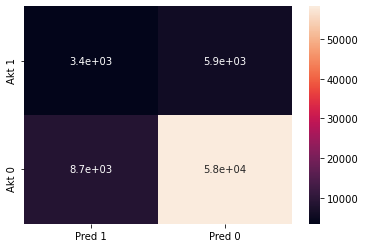

In [130]:
sns.heatmap(dfSM_DT, annot=True)

#### 2. SMOTE Random Forest

In [131]:
modelSMOTE_RF = RandomForestClassifier()

In [132]:
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [133]:
modelSMOTE_RF.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [134]:
y_predRF_sm = modelSMOTE_RF.predict(x_test)

In [135]:
accSM_RF = accuracy_score(y_test, y_predRF_sm)
print('accuracy : {}'.format(accSM_RF))

precSM_RF = precision_score(y_test, y_predRF_sm)
print('Precision : {}'.format(precSM_RF))

recSM_RF = recall_score(y_test, y_predRF_sm)
print('Recall : {}'.format(recSM_RF))

print('-'*100)
print(classification_report(y_test, y_predRF_sm))

accuracy : 0.8184776048909763
Precision : 0.318994683421943
Recall : 0.4238921001926782
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     66880
           1       0.32      0.42      0.36      9342

    accuracy                           0.82     76222
   macro avg       0.62      0.65      0.63     76222
weighted avg       0.84      0.82      0.83     76222



In [136]:
cmSM_RF = confusion_matrix(y_test, y_predRF_sm, labels=[1,0])
dfSM_RF = pd.DataFrame(data=cmSM_RF, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
dfSM_RF

,Pred 1,Pred 0
Akt 1,3960,5382
Akt 0,8454,58426


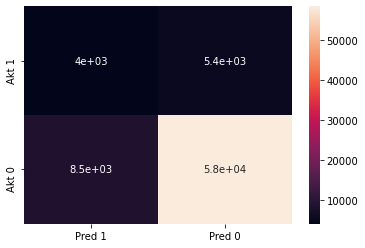

In [137]:
sns.heatmap(dfSM_RF, annot=True)